In [65]:
import numpy as np

import matplotlib.pyplot as plt

In [66]:
# Load in the data from robustness.csv
data = np.loadtxt('robustness.csv', delimiter=',')

In [67]:
# Recreate the noise levels for graphing
min_noise_level = 0
max_noise_level = 0.5
num_noise_levels = 50
noise_levels = np.linspace(min_noise_level, max_noise_level, num_noise_levels)

In [69]:
colors = ['red', 'purple', 'blue', 'green', 'black']

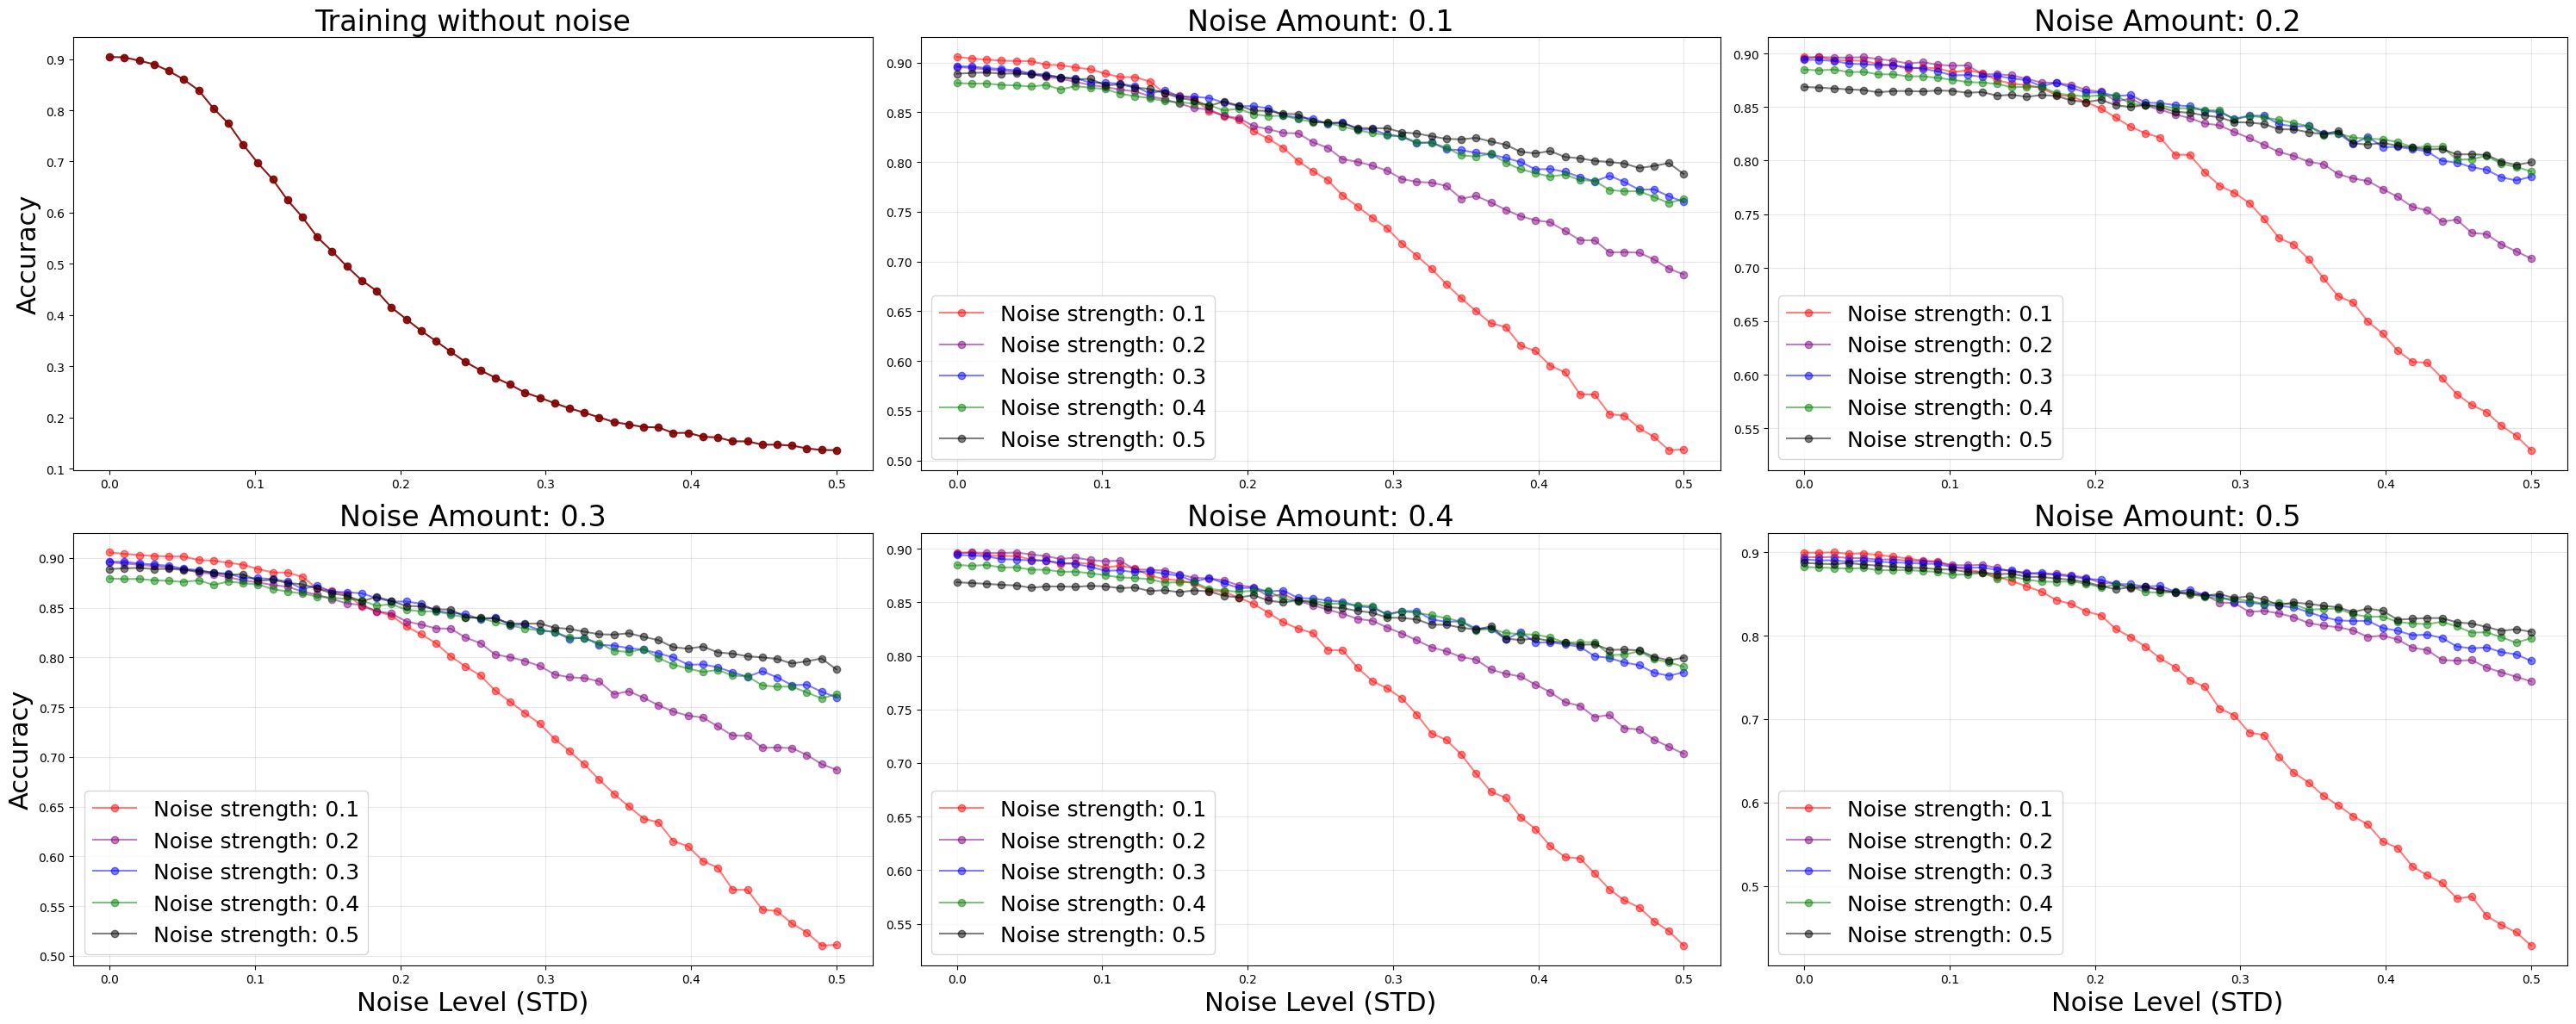

In [145]:
# Create a set of 5 subplots each plotting 5 rows of data starting with row 2
f, axs = plt.subplots(2, 3, figsize=(30, 12))
axs[0][0].set_ylabel('Accuracy', fontsize=22)
axs[1][0].set_ylabel('Accuracy', fontsize=22)
axs[1][0].set_xlabel('Noise Level (STD)', fontsize=22)
axs[1][1].set_xlabel('Noise Level (STD)', fontsize=22)
axs[1][2].set_xlabel('Noise Level (STD)', fontsize=22)

# Plot the first set of data as the training without noise
axs[0][0].plot(noise_levels, data[0], '-o', color='maroon', alpha=0.9)
axs[0][0].set_title('Training without noise', fontsize=24)

# Each subsequent plot takes the next 5 sets of data and has increasing noise amount
for i in range(2):
    for j in range(3):
      if i == 0 and j == 0:
        continue
      ax = axs[i][j]
      for k in range(5):
        ax.plot(noise_levels, data[(i + j) * 5 + k + 1], '-o',color = colors[k], alpha=0.5, label =f'Noise strength: {k * 0.1 + 0.1:.1f}')
      ax.set_title(f'Noise Amount: {(i * 3 + j) * 0.1:.1f}', fontsize=24)
      ax.grid(alpha=0.3)
      ax.legend(fontsize=18, loc='lower left')
f.tight_layout()

In [146]:
average_accuracy = np.mean(data, axis=1)

In [101]:
averages_of_noise_amounts = [np.mean(average_accuracy[1 + i * 5: 6 + i * 5]) for i in range(5)]
print(f'Average accuracy for each noise amount:\nNo noise: {average_accuracy[0]:.2f}')
for i in range(5):
  print(f'Noise amount {0.1 * i + 0.1:.1f}: {averages_of_noise_amounts[i]:.2f}')

Average accuracy for each noise amount:
No noise: 0.41
Noise amount 0.1: 0.80
Noise amount 0.2: 0.81
Noise amount 0.3: 0.83
Noise amount 0.4: 0.82
Noise amount 0.5: 0.83


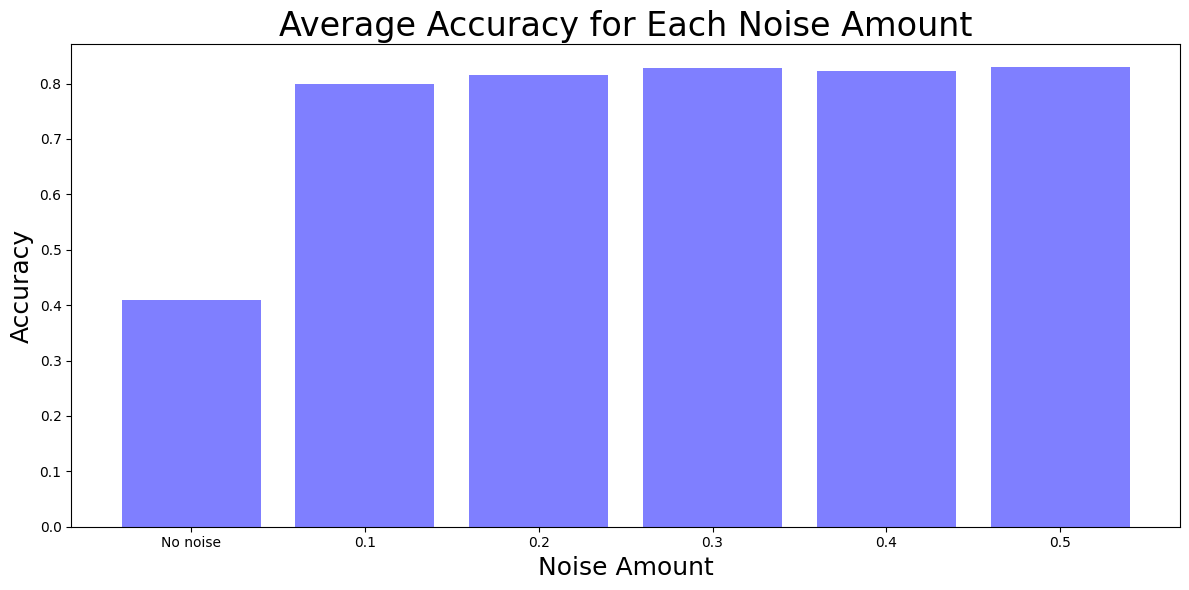

In [143]:
# a bar graph of the average accuracy for each noise amount
labels = ['0.1', '0.2', '0.3', '0.4', '0.5']
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar("No noise", average_accuracy[0], color='blue', alpha=0.5)
ax.bar(labels, averages_of_noise_amounts, color='blue', alpha=0.5)
ax.set_xlabel('Noise Amount', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Average Accuracy for Each Noise Amount', fontsize=24)
f.tight_layout()

In [104]:
averages_of_noise_levels = np.mean(average_accuracy[1:26].reshape(5, 5), axis=0)
print(f'Average accuracy for each noise level:\nNo noise: {average_accuracy[0]:.2f}')
for i in range(5):
  print(f'Noise level {0.1 * i + 0.1:.1f}: {averages_of_noise_levels[i]:.2f}')

Average accuracy for each noise level:
No noise: 0.41
Noise level 0.1: 0.74
Noise level 0.2: 0.82
Noise level 0.3: 0.84
Noise level 0.4: 0.84
Noise level 0.5: 0.84


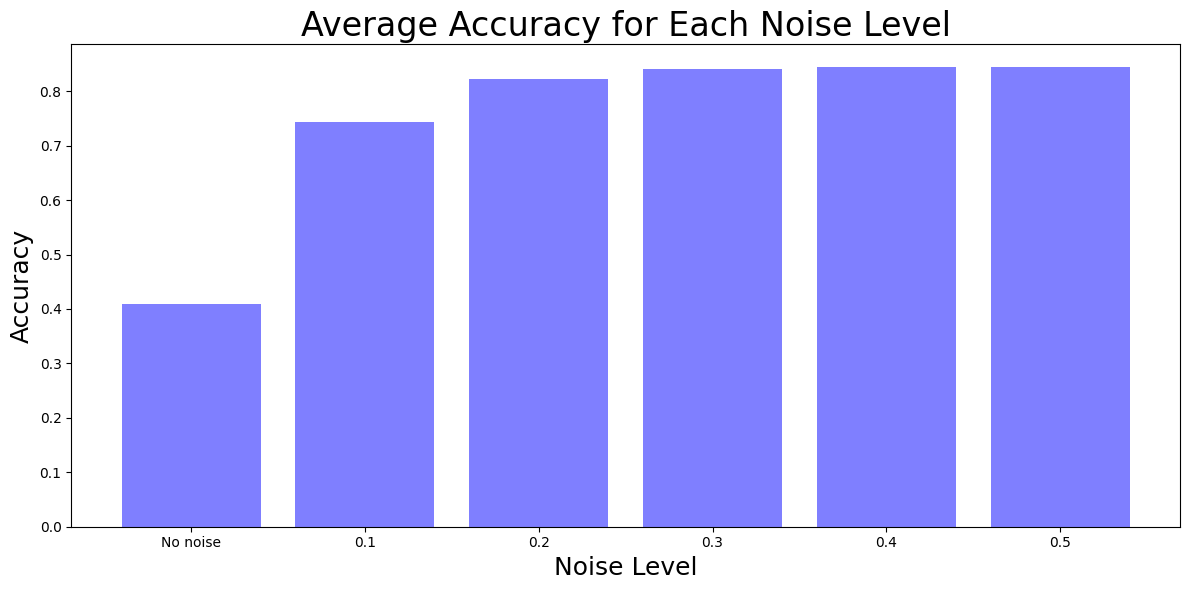

In [144]:
# a bar graph of the average accuracy for each noise level
labels = ['0.1', '0.2', '0.3', '0.4', '0.5']
f, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar("No noise", average_accuracy[0], color='blue', alpha=0.5)
ax.bar(labels, averages_of_noise_levels, color='blue', alpha=0.5)
ax.set_xlabel('Noise Level', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Average Accuracy for Each Noise Level', fontsize=24)
f.tight_layout()